In [73]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [74]:
cancer = datasets.load_breast_cancer()
type(cancer) # возвращает тип объекта cancer, который был загружен функцией load_breast_cancer()

sklearn.utils._bunch.Bunch

In [84]:
cancer.target_names # Наши y зависимые переменные (злокачественная и доброкачественная)

array(['malignant', 'benign'], dtype='<U9')

In [76]:
cancer.feature_names # Исследуем рак кожи, например: радиус родинки, если сильное, то злокачественная опохоль развивается (факторы вероятности, что опохоль злокачественная или доброкачественная) 

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [77]:
X = cancer.data[:,:2] # забираем данные из датасета
Y = cancer.target

In [78]:
model = LogisticRegression() # логистическая регрессия оценивает вероятность принадлежности к двум признакам, что опохоль злокачественная или доброкачественная
model2 = SVC() #методов опорных векторов, алгоритм машинного обучения, используемый для задач классификации. Находит плоскость в которой расстояние между точками одного класса минимальное.Сортирует признаки по классам
model.fit(X,Y)
model2.fit(X,Y)

SVC()

In [79]:
import numpy as np
import matplotlib.pyplot as plt

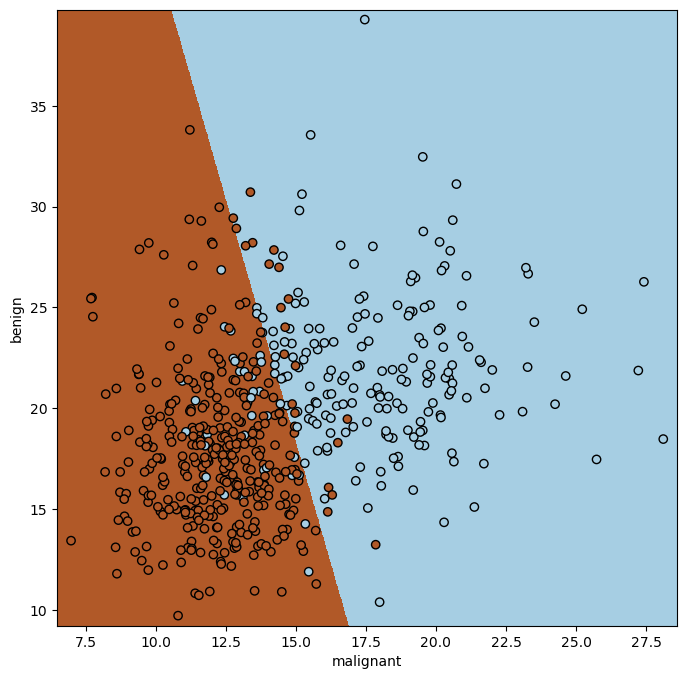

In [80]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('malignant')
plt.ylabel('benign')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()   # Я построил 2 плоскости и метод опорных векторов распредел мне точки по плоскастям.
# Распределило все правильно ( синие точки - злокачественная опохоль, а коричневые точки - доброкачественная опохоль)

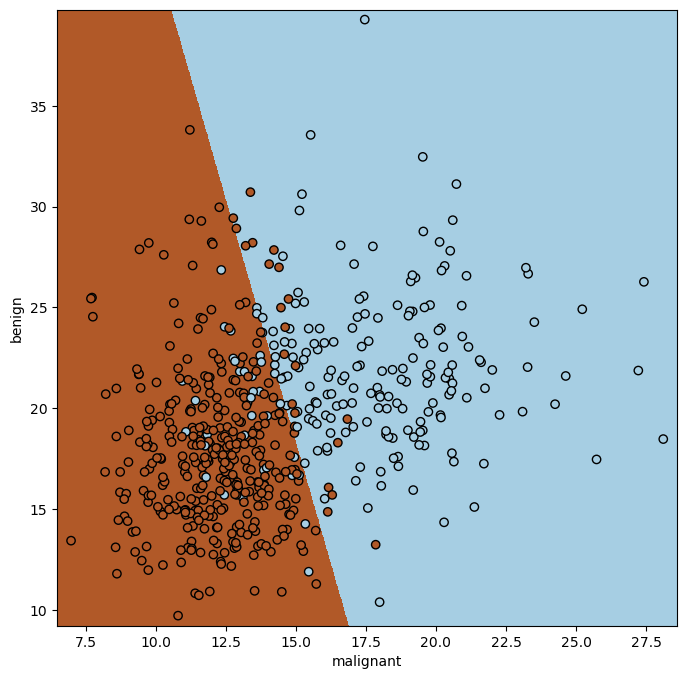

In [81]:
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('malignant')
plt.ylabel('benign')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show() # Я построил 2 плоскости и метод опорных векторов распредел мне точки по плоскастям.
# Распределило все правильно ( синие точки - злокачественная опохоль, а коричневые точки - доброкачественная опохоль)

In [82]:
model2 = SVC(kernel = 'poly', degree=7) #Этот код создает и обучает модель классификации (SVC) с полиномиальным ядром
model2.fit(X,Y) # kernel='poly': Полиномиальное ядро позволяет  находить нелинейные признаки
#degree=7 угол степень сложности поиска нелинейных зависимостей (7 степень). Чем больше степень, тем чаще модель будет ошибаться.

SVC(degree=7, kernel='poly')

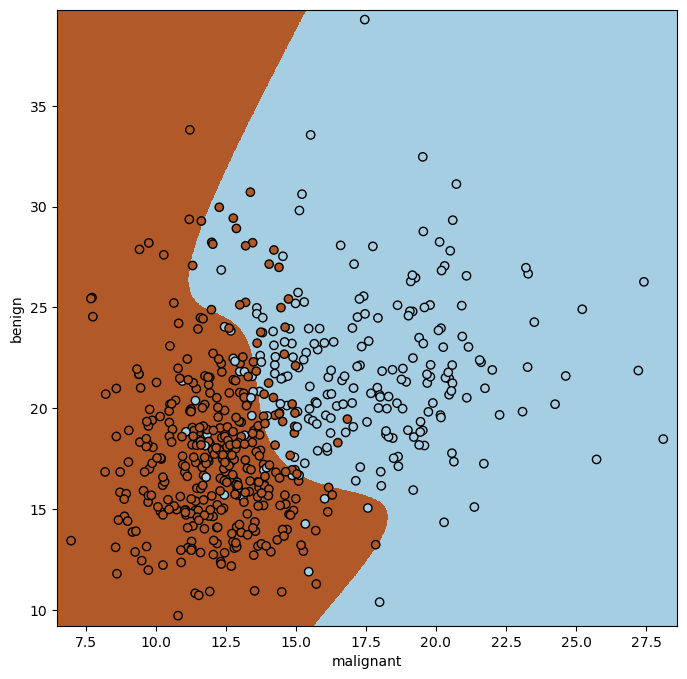

In [83]:
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('malignant')
plt.ylabel('benign')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show() # Мы применяем полиномиальное ядро для анализа наших атрибутов и получаем более точную модель (лучше определяет, какой у нас их типов рака)